#Laboratorio 10 

##Grupo 1:

Amaya Osorio, Kevin Arturo

Anzola Tachak, Gabriel Andres

Arias Parra, David Alexander 


1. Estimate the probability of getting a 21, the average number of cards required to complete 21 and plot the experimental distribution of the number of card required to complete 21 drawing cards sequentially from a shuffled Spanish 48-card deck with card values [1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12] and from a shuffled Poker 52-card with card values [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13] using Montecarlo with 10 millions simulations.

    A n-card deck is shuffled if t all possible n! decks have equal probability 1/n! or equivalently if when choosing any card of the shuffled deck all n cards have the same probability 1/n of appearing.
    Hint: Instead of shuffling the card deck an drawing sequentially it is equivalent to have a sorted list representing the cards and draw cards randomly located from that list with random.choice(list).

Spanish Deck: 
Probability of getting a 21: 15.863
Average cards to get 21: 3.4776139443989162


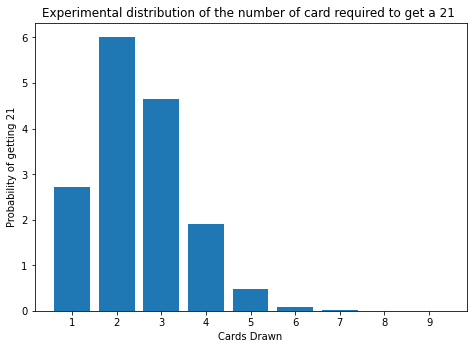

------------------------------------------------------------------------
Poker Deck: 
Probability of getting a 21: 14.4895
Average cards to get 21: 3.215919113841058


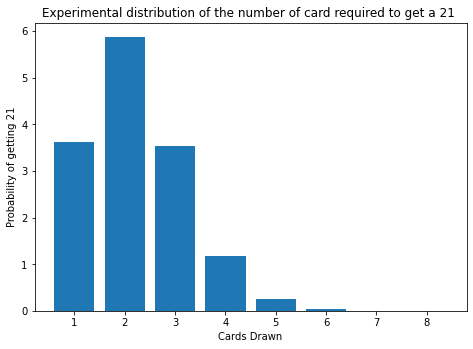

------------------------------------------------------------------------


In [35]:
import random
import copy
from numpy import zeros
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

SPANISH_DECK = [1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12] 
POKER_DECK = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]
N_SIMULATION = 10000000

def shuffleDeck(deck):
  random.shuffle(deck)

def getCardSum(deck, currentCardSum=0, remainingCards=0):
  cardsPicked = []
  shuffleDeck(deck)
  cardSum = currentCardSum
  if remainingCards!=0:
    remainingCards = int(remainingCards)
    cardsPicked = deck[:remainingCards]
    deck = deck[remainingCards:]
  while cardSum < 21:
    randomCard = random.choice(deck)
    index = random.choice(range(len(deck)))
    cardSum = cardSum + deck[index]
    cardsPicked.append(deck.pop(index))
  deck.extend(cardsPicked)
  return [cardSum, len(cardsPicked)]

def setPercentage(n,cardsOccurrences):
  for i in range(0,len(cardsOccurrences)):
    cardsOccurrences[i] = (cardsOccurrences[i]/n) * 100
  return cardsOccurrences

def AverageCards(cardsOccurrences):
  total = 0
  ocurrences = 0
  for index, cardsOccurrence in enumerate(cardsOccurrences):
    if cardsOccurrence != 0 :
      total += (index)*cardsOccurrence
      ocurrences += cardsOccurrence
  if ocurrences>0:
    return total/ocurrences
  return 0 

def increaseOccurrences(cardSum, occurrences, cardsPicked, cardsOccurrences):
  if cardSum == 21:
    cardsOccurrences[cardsPicked] = cardsOccurrences[cardsPicked]+1
    occurrences = occurrences+1
  return occurrences

def Montecarlo(n, deck, currentCardSum=0, remainingCards=0):
  occurrences = 0
  remainingCards = int(remainingCards)
  cardsOccurrences = zeros(len(deck))
  for i in range(0,n):
    cardSum, cardsPicked = getCardSum(deck, currentCardSum, remainingCards)
    occurrences = increaseOccurrences(cardSum, occurrences, cardsPicked, cardsOccurrences)
  totalOccurrencesPercent =  occurrences/n * 100
  cardsOccurrencesPercentage = setPercentage(n,cardsOccurrences)
  return [cardsOccurrencesPercentage,totalOccurrencesPercent,cardsOccurrences]

def deleteZeros(cardsOccurrences):
  return list(filter(lambda num: num != 0, cardsOccurrences))

def drawOccurrences(cardsOccurrences):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  cardsOccurrences = deleteZeros(cardsOccurrences)
  langs = list(range(1, len(cardsOccurrences)+1))
  ax.bar(langs, cardsOccurrences)
  ax.set_title('Experimental distribution of the number of card required to get a 21 ')
  ax.set_xlabel('Cards Drawn')
  ax.set_ylabel('Probability of getting 21')
  plt.show()

def printResults(cardsOccurrencesPercentage, totalOcurrencesPercent, cardsOccurrences, deckTitle):
  print(deckTitle)
  print("Probability of getting a 21: %s" % (totalOcurrencesPercent))
  print("Average cards to get 21: %s" % (AverageCards(cardsOccurrences)))
  drawOccurrences(cardsOccurrencesPercentage)
  print("------------------------------------------------------------------------")

cardsOccurrencesPercentage, totalOcurrencesPercent, cardsOccurrences = Montecarlo(N_SIMULATION, SPANISH_DECK)
printResults (cardsOccurrences, totalOcurrencesPercent, cardsOccurrences, "Spanish Deck: ")

cardsOccurrencesPercentage, totalOcurrencesPercent, cardsOccurrences = Montecarlo(N_SIMULATION, POKER_DECK)
printResults (cardsOccurrencesPercentage, totalOcurrencesPercent, cardsOccurrences, "Poker Deck: ")

2. Estimate the probability of getting a 21, the average number of cards required to complete 21 and plot the experimental distribution of the number of card required to complete 21 drawing cards sequentially from a shuffled Spanish 48-card deck with card values [1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,8,9,10,10 10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10] and from a shuffled Poker 52-card deck with card values [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6 7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]using Montecarlo with 10 millions simulations.

Spanish Deck 48: 
Probability of getting a 21: 15.8664
Average cards to get 21: 3.477367896939444


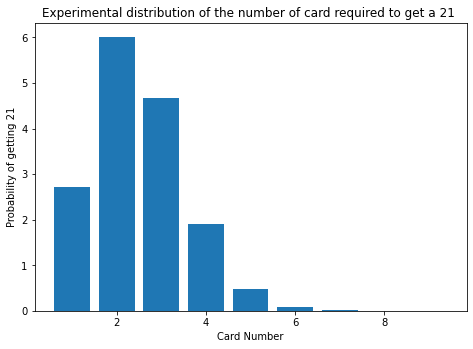

------------------------------------------------------------------------
Poker Deck 52: 
Probability of getting a 21: 14.47643
Average cards to get 21: 3.2154716321634553


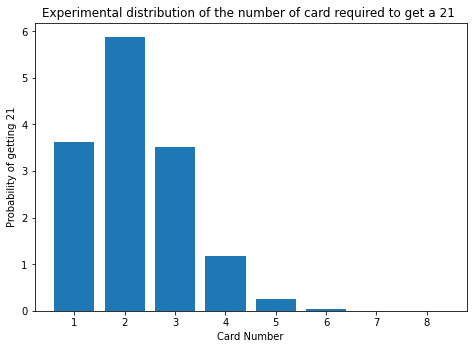

------------------------------------------------------------------------


In [ ]:
SPANISH_DECK_48 = [1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]
POKER_DECK_52 = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

cardsOccurrencesPercentage, totalOcurrencesPercent, cardsOccurrences = Montecarlo(N_SIMULATION, SPANISH_DECK)
printResults (cardsOccurrences, totalOcurrencesPercent, cardsOccurrences, "Spanish Deck 48: ")

cardsOccurrencesPercentage, totalOcurrencesPercent, cardsOccurrences = Montecarlo(N_SIMULATION, POKER_DECK)
printResults (cardsOccurrencesPercentage, totalOcurrencesPercent, cardsOccurrences, "Poker Deck 52: ")


3. Estimate the probability of getting a 21, the average total number of cards required to complete 21 and lot the experimental distribution of the number of card required to complete 21; assuming that you have in your hand the cards [7,7,5] and the remaining deck has n/2 cards for the regular Spanish 48-card deck and the Poker 52-card decks. You can pick the n/2 cards in the remaining deck in whatever way you choose but with restriction that this has maximum two 7s and three 5, you have to keep the remaining deck fixed through the Montecarlo simulations, use 10 million simulations.

Spanish Deck 48: 
Probability of getting a 21: 9.981869999999999
Average cards to get 21: 24.067059579016757


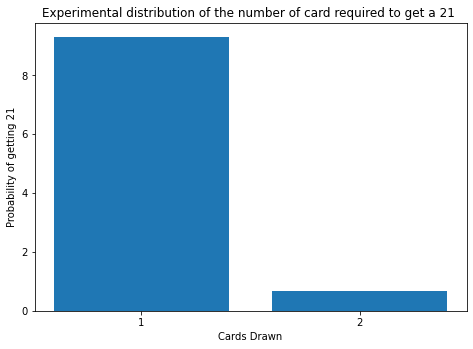

------------------------------------------------------------------------
Spanish Deck 48: 
Probability of getting a 21: 8.68109
Average cards to get 21: 27.058554858894446


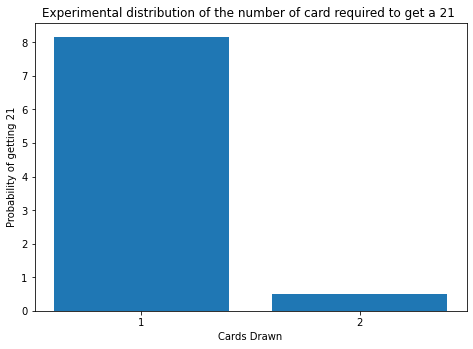

------------------------------------------------------------------------


In [47]:
SPANISH_DECK_WITHOUT_775 = [1,2,3,4,6,10,10,10,1,2,3,4,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]
POKER_DECK_WITHOUT_775 = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,6,8,9,10,10,10,10,1,2,3,4,5,6,8,9,10,10,10,10]


cardsOccurrencesPercentage, totalOcurrencesPercent, cardsOccurrences = Montecarlo(N_SIMULATION, SPANISH_DECK_WITHOUT_775, currentCardSum = 19, remainingCards = len(SPANISH_DECK_48)/2)
printResults (cardsOccurrences, totalOcurrencesPercent, cardsOccurrences, "Spanish Deck 48: ")

cardsOccurrencesPercentage, totalOcurrencesPercent, cardsOccurrences = Montecarlo(N_SIMULATION, POKER_DECK_WITHOUT_775, currentCardSum = 19, remainingCards = len(POKER_DECK_52)/2)
printResults (cardsOccurrences, totalOcurrencesPercent, cardsOccurrences, "Spanish Deck 48: ")

4. Estimate and calculate analytically the probability of getting a 21, the average total number of cards required to complete 21 and the experimental distribution of the number of card required to complete 21; assuming that you have in your hand the cards [7,7,5] and the remaining deck has two possible sets of 8 cards for the regular Spanish 48-card deck and the Poker 52-card decks. The two possible remaining decks are a (hot deck) that contains four 1 cards and four 2 cards a (cold deck) with not 1 or 2 cards, for the estimations use Montecarlo with 10 million simulations.

##Calculate analytically the probability of getting 21

Our hand is [7,7,5] so we got a 19 hand and that leaves us few possibilities to get 21, with either deck we need to draw [1,1] or [2].

Since getting 21 is impossible on a Cold deck we only need to find out the probability of getting a hot deck AND drawing 21 on that deck, so:

> P(Getting 21) = P(Getting hot deck AND Drawing 21 on a hot deck) = P(Getting a hot deck) * P(Drawing 21 on a hot deck) 

Since the probabiliy of getting a hot deck is not dependent on the probability of Drawing 21 on a hot deck. 

--------------------------------------------------------------------------------

**P(Getting a hot deck):**

Since the deck is either cold or hot, there are a total of: 

*   (48-3-8)!=37! Hot decks for a 48 Spanish Deck. (48 total cards - 3 we picked - 4 1 cards - 4 2 cards)  
*   (52-3-8)=41! Hot decks for a 52 poker deck.

And 

*   (48-3-8)!=37! Cold decks for a 48 Spanish Deck. (48 total cards - 3 we picked - 4 1 cards - 4 2 cards) 
*   (52-3-8)=41! Cold decks for a 52 poker deck.

For a 48 Spanish Deck:

> P(getting a hot deck)=37!/(37! + 37!) ~ 1/2

For a 52 Poker Deck:
 
> P(getting a hot deck)=41!/(41! + 41!) ~ 1/2

Since there are as many cold decks as there are hot decks we get a 0.5 probability of getting either of them.

--------------------------------------------------------------------------------

**P(Drawing 21 on a hot deck):**

We got two ways of getting a 21, we either must draw two ones or a single 2 hence: 

P(Drawing 21 on a hot deck) = P( Two ones draw ) + Pr( Single two draw )

Due to them being non dependant events, hence:

For a 48 Spanish deck
*   P( Two ones draw ) = 4/37 * 3/36
*   P( Single two draw ) = 4/37

> The probabily of getting 21 on a Hot deck is: 13/111

For a 52 Spanish deck
*   P( Two ones draw ) = 4/41 * 3/40
*   P( Single two draw ) = 4/41

> The probabily of getting 21 on a Hot deck is: 43/410

--------------------------------------------------------------------------------

Finally we have that:

**For a 48 Spanish deck:**

> P(Drawing 21) = P(Getting a hot deck) * P(Drawing 21 on a hot deck)  = 1/2 * 13/111 = 13/222 ~ 0.059 

**For a 52 Poker deck:**

> P(Drawing 21) = P(Getting a hot deck) * P(Drawing 21 on a hot deck)  = 1/2 * 43/410 = 43/820 ~ 0.052


##Estimate Using Montecarlo

Spanish Deck Hot/Cold 48: 
Probability of getting a 21: 5.52084
Average cards to get 21: 1.0724128936900905


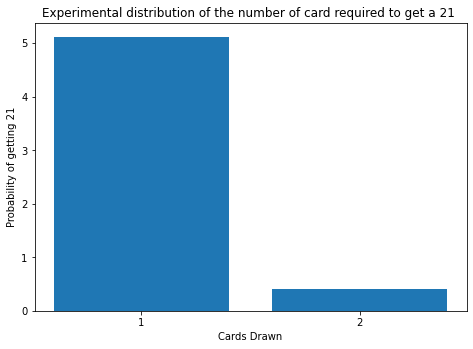

------------------------------------------------------------------------
Poker Deck Hot/Cold 52: 
Probability of getting a 21: 4.42932
Average cards to get 21: 1.0598173083001454


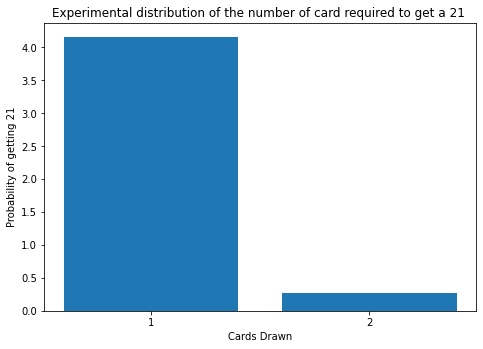

------------------------------------------------------------------------


In [36]:
HOT_SPANISH_DECK_WITHOUT_775 = [1,1,1,1,2,2,2,2,4,6,10,10,10,3,4,6,8,9,10,10,10,3,4,6,8,9,10,10,10,3,4,5,6,7,8,9,10,10,10]
COLD_POKER_DECK_WITHOUT_775 = [1,1,1,1,2,2,2,2,3,4,5,6,7,8,9,10,11,12,133,4,5,6,7,8,9,10,10,10,10,3,4,6,8,9,10,10,10,10,3,4,5,6,8,9,10,10,10,10]
N_SIMULATION = 10000000

def pickCards(deck, hotdeck):
  chooseNumber = random.randint(1,len(deck))
  cardsPicked = deck[:chooseNumber]
  hotdeck.extend(cardsPicked)
  return hotdeck

def isCold():
  hotColdRandom = random.uniform(0,1)
  return hotColdRandom<0.5

def hotColdMontecarlo(n, deck, currentCardSum, spanishDeck=True):
  currentCardSum = int(currentCardSum)
  cardsOccurrences = zeros(len(deck))
  occurrences = 0
  for i in range(0,n): 
    if isCold():
      continue
    if spanishDeck:
      hotDeck = HOT_SPANISH_DECK_WITHOUT_775
    else:
      hotDeck = COLD_POKER_DECK_WITHOUT_775
    cardSum, cardsPicked = getCardSum(hotDeck, currentCardSum)
    occurrences = increaseOccurrences(cardSum, occurrences, cardsPicked, cardsOccurrences)
  totalOccurrencesPercent =  occurrences/n * 100
  cardsOccurrencesPercentage = setPercentage(n,cardsOccurrences)  
  return [cardsOccurrencesPercentage,totalOccurrencesPercent,cardsOccurrences]

cardsOccurrencesPercentage, totalOcurrencesPercent, cardsOccurrences = hotColdMontecarlo(N_SIMULATION, HOT_SPANISH_DECK_WITHOUT_775, currentCardSum = 19)
printResults (cardsOccurrences, totalOcurrencesPercent, cardsOccurrences, "Spanish Deck Hot/Cold 48: ")

cardsOccurrencesPercentage, totalOcurrencesPercent, cardsOccurrences = hotColdMontecarlo(N_SIMULATION, COLD_POKER_DECK_WITHOUT_775, currentCardSum=19, spanishDeck=False)
printResults (cardsOccurrences, totalOcurrencesPercent, cardsOccurrences, "Poker Deck Hot/Cold 52: ")

5. Estimate the average amount of money (expected value) that Ben wins or losses on a weekend if Ben goes to Vegas every weekend (Friday, Saturday and Sunday), plays every weekend day 10 hours, each game takes 3 mins. Assume that for each game he gets two possibilities, in one he gets in his hand the cards [7,7,5] and a remaining hot deck with 8 cards in which case he bets \$1000 this happens with probability 1/10; in the other one he gets no cards in his hand a complete shuffled deck in which case he bets $10, this happens with the remaining probability 9/10. Use 10000 Montecarlo simulations to estimated the expected amount of money that Ben wins or losses on a weekend for the Spanish 48-card deck and for a Poker 52-card deck.

In [50]:
SPANISH_DECK_48 = [1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]
POKER_DECK_52 = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

N_SIMULATIONS = 10000
DAYS = 3
HOURS_PER_DAY = 10
MINUTES_PER_GAME = 3
NUMBER_OF_GAMES = ((DAYS * HOURS_PER_DAY)*(60))/MINUTES_PER_GAME

def has775Hand(): 
  hasHand = random.uniform(0,1)
  return hasHand<0.1

def bettingOn775Hand(spanishDeck):
  BET = 1000
  if spanishDeck:
    deck = SPANISH_DECK_48
  else:
    deck = POKER_DECK_52
  cardSum, cardsPicked = getCardSum(deck, currentCardSum=19)
  if cardSum>21 :
    return BET
  return -BET

def bettingOnNoHand(spanishDeck):
  BET = 10
  if spanishDeck:
    deck = SPANISH_DECK_48
  else:
    deck = POKER_DECK_52
  cardSum, cardsPicked = getCardSum(deck)
  if cardSum>21 :
    return BET
  return -BET

def montecarlo(numberGames, deck, spanishDeck=True):
  earnings = 0
  numberGames = int(numberGames)
  for i in range(0,numberGames):
    if has775Hand():
      earnings += bettingOn775Hand(spanishDeck)
      continue
    earnings += bettingOnNoHand(spanishDeck)
  return earnings

print("Estimated earnings with Spanish Deck: %s" %montecarlo(NUMBER_OF_GAMES, SPANISH_DECK_48))
print("Estimated earnings with Poker Deck: %s" %montecarlo(NUMBER_OF_GAMES, POKER_DECK_52, False))

Estimated earnings with Spanish Deck: 43400
Estimated earnings with Poker Deck: 44810
